In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("measurements.csv")

In [7]:
df.shape

(388, 12)

In [93]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12.0,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,11.2,"5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,12.9,"3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,18.5,"4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [5]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [106]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [107]:
df['consume']= df['consume'].str.replace(',' ,  '.').astype(float)

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [103]:
df['temp_inside']= df['temp_inside'].str.replace(',' ,  '.').astype(float)

In [108]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [126]:
df = df.fillna(0)

In [127]:
df.isnull().any(axis = 0)

distance         False
consume          False
speed            False
temp_inside      False
temp_outside     False
specials         False
gas_type         False
AC               False
rain             False
sun              False
refill liters    False
refill gas       False
dtype: bool

<Figure size 360x360 with 0 Axes>

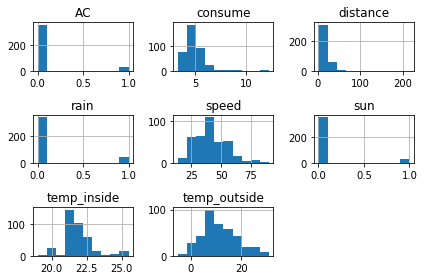

<Figure size 360x360 with 0 Axes>

In [109]:
#各説明変数のヒストグラム
df.hist()
plt.tight_layout()
plt.figure(figsize = (5,5))

Text(0, 0.5, 'consume')

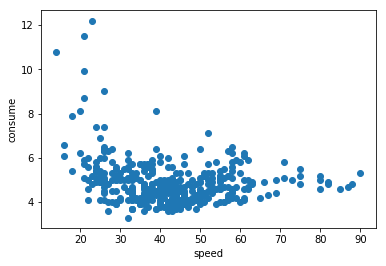

In [110]:
#各説明変数と目的変数の散布図
plt.scatter(df['speed'], df['consume'])
plt.xlabel('speed')
plt.ylabel('consume')

In [111]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
from sklearn.model_selection import train_test_split

In [128]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters     object
refill gas        object
dtype: object

In [129]:
X = df.iloc[:,[0,2,3,4,7,8,9]]
y = df.iloc[:,1]
X.head()

,distance,speed,temp_inside,temp_outside,AC,rain,sun
0,28.0,26,21.5,12,0,0,0
1,12.0,30,21.5,13,0,0,0
2,11.2,38,21.5,15,0,0,0
3,12.9,36,21.5,14,0,0,0
4,18.5,46,21.5,15,0,0,0


In [130]:
y.head()

0    5.0
1    4.2
2    5.5
3    3.9
4    4.5
Name: consume, dtype: float64

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 1)

In [132]:
model = LinearRegression()

In [133]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
model.score(X_test,y_test)

0.19501638350157458

In [136]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [139]:
x = X.iloc[0,:]
x

distance        28.0
speed           26.0
temp_inside     21.5
temp_outside    12.0
AC               0.0
rain             0.0
sun              0.0
Name: 0, dtype: float64

In [147]:
y_pred = model.predict(X)

In [149]:
mean_absolute_error(y, y_pred)

0.6163693995547455

In [152]:
mean_squared_error(y, y_pred)

0.8479018687383845

In [153]:
np.sqrt(mean_squared_error(y, y_pred))

0.9208158712459209